In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
t_ch2025 = "/jetfs/scratch/mmeindl/HighResLearn/download/CH2025/tas_mpiesm_ref91-20_smhi-rca.nc"
t_destine = "/jetfs/home/mmeindl/ClimXtract/tests/tas_ICON_20200901-20200930_remapdis_mask.nc"
t_cordex = "/jetfs/home/mmeindl/ClimXtract/tests/tas_MPI-M-MPI-ESM-LR_rcp45_r1i1p1_RCA4_20160101-20201231_remapdis_mask.nc"

In [3]:
t_ch2025 = xr.open_dataset(t_ch2025)
t_destine = xr.open_dataset(t_destine)
t_cordex = xr.open_dataset(t_cordex)

In [4]:
t_ch2025

<xarray.Dataset> Size: 4GB
Dimensions:                 (time: 10950, N: 240, E: 370)
Coordinates:
  * time                    (time) object 88kB 0001-01-01 00:00:00 ... 0030-1...
    lon                     (N, E) float32 355kB ...
    lat                     (N, E) float32 355kB ...
  * E                       (E) float64 3kB 2.474e+06 2.476e+06 ... 2.844e+06
  * N                       (N) float64 2kB 1.064e+06 1.066e+06 ... 1.304e+06
Data variables:
    swiss_lv95_coordinates  float32 4B ...
    tas                     (time, N, E) float32 4GB ...
Attributes: (12/20)
    CDI:                    Climate Data Interface version 2.4.0 (https://mpi...
    Conventions:            CF-1.8
    CDO:                    Climate Data Operators version 2.4.0 (https://mpi...
    NCO:                    netCDF Operators version 5.1.9 (Homepage = http:/...
    license:                https://creativecommons.org/licenses/by/4.0
    GWL:                    ref91-20
    ...                     ...
    contact:                klimaszenarien@meteoschweiz.ch
    project:                Climate CH2025 - New Climate Scenarios for Switze...
    institution:            MeteoSwiss & ETH Zurich
    references:             MeteoSwiss & ETH Zurich (2025): Climate CH2025 - ...
    citation:               MeteoSwiss & ETH Zurich (2025): Climate CH2025 - ...
    title:                  Climate CH2025 DAILY-GRIDDED dataset: Bias-correc...

In [5]:
t_destine

<xarray.Dataset> Size: 11MB
Dimensions:  (time: 30, N: 240, E: 370)
Coordinates:
  * time     (time) datetime64[ns] 240B 2020-09-01 2020-09-02 ... 2020-09-30
    lon      (N, E) float32 355kB ...
    lat      (N, E) float32 355kB ...
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.064e+06 1.066e+06 ... 1.302e+06 1.304e+06
Data variables:
    tas      (time, N, E) float32 11MB ...

In [6]:
t_cordex

<xarray.Dataset> Size: 650MB
Dimensions:  (time: 1827, N: 240, E: 370)
Coordinates:
  * time     (time) datetime64[ns] 15kB 2016-01-01T12:00:00 ... 2020-12-31T12...
    lon      (N, E) float32 355kB ...
    lat      (N, E) float32 355kB ...
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.064e+06 1.066e+06 ... 1.302e+06 1.304e+06
Data variables:
    tas      (time, N, E) float32 649MB ...

In [10]:
# -----------------------------------------------------------
# 1. Load datasets
# -----------------------------------------------------------

ds_ch2025 = t_ch2025['tas']
ds_destine = t_destine['tas']
ds_cordex  = t_cordex['tas']

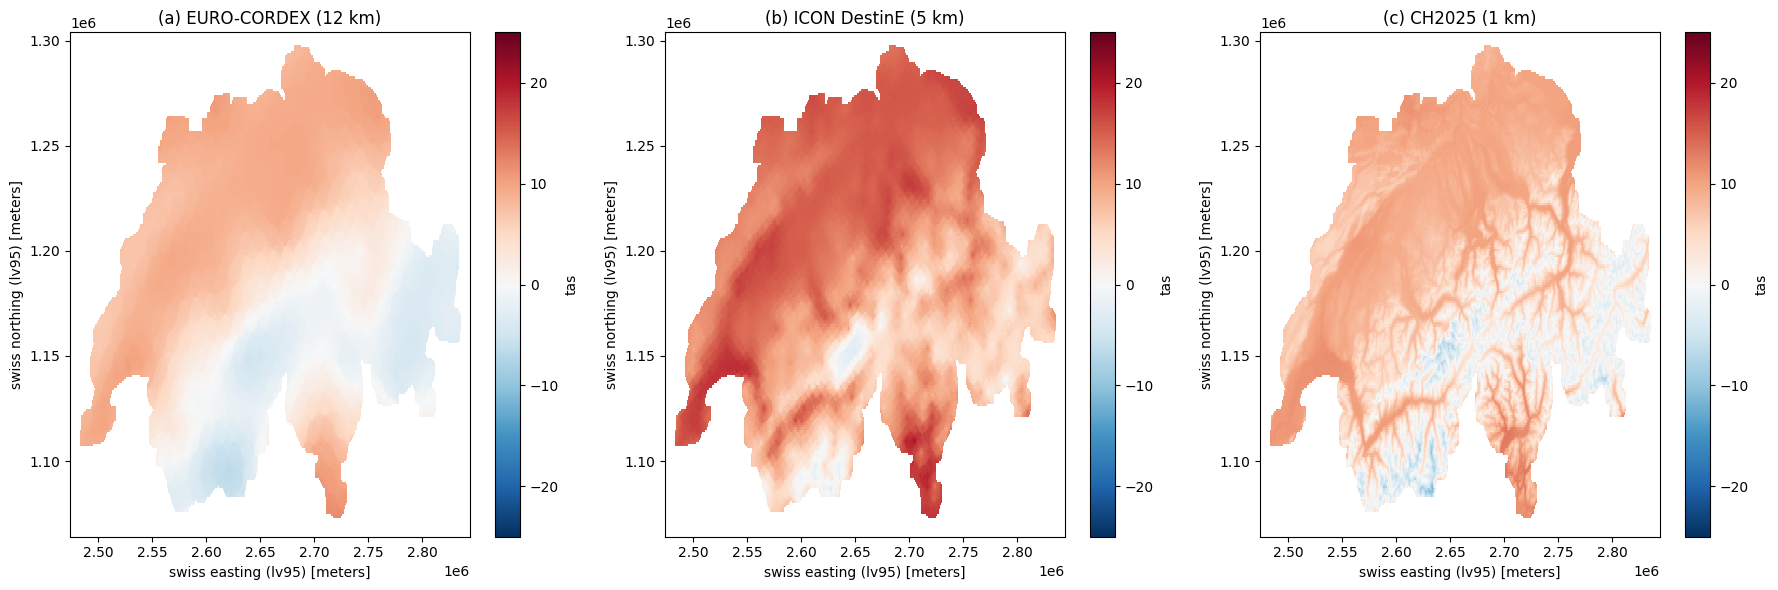

In [15]:
# -----------------------------------------------------------
# 2. Compute mean over TIME only
# -----------------------------------------------------------

mean_ch2025 = ds_ch2025.mean(dim="time")
mean_destine = ds_destine.mean(dim="time")
mean_cordex = ds_cordex.mean(dim="time")

# -----------------------------------------------------------
# 3. Plot 3 subplots (maps)
# -----------------------------------------------------------

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# (a) EURO-CORDEX
im1 = mean_cordex.plot(ax=ax[0], cmap="RdBu_r", vmin=-25, vmax=25)
ax[0].set_title("(a) EURO-CORDEX (12 km)")

# (b) ICON DestinE
im2 = mean_destine.plot(ax=ax[1], cmap="RdBu_r", vmin=-25, vmax=25)
ax[1].set_title("(b) ICON DestinE (5 km)")

# (c) CH2025
im3 = mean_ch2025.plot(ax=ax[2], cmap="RdBu_r", vmin=-25, vmax=25)
ax[2].set_title("(c) CH2025 (1 km)")

plt.tight_layout()
plt.show()